In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [33]:
chicago_list = pd.read_csv(
    "/Users/maidat/Downloads/Privy/CSV/red_chicago_property_listings.csv",
    low_memory=False)

In [3]:
chicago_list_clean = chicago_list.copy()

In [4]:
chicago_list_clean = chicago_list.dropna(axis=1,how='all')
chicago_list_clean = chicago_list_clean.dropna(how='all')

In [5]:
chicago_list_clean.shape

(1696381, 60)

In [6]:
chicago_list_clean.columns

Index(['id', 'property_id', 'listing_number', 'status_changed_on',
       'created_at', 'updated_at', 'status', 'listed_on', 'contracted_on',
       'off_market_on', 'sold_on', 'list_price', 'sold_price',
       'original_list_price', 'previous_price', 'seller_concessions',
       'above_grade_square_feet', 'total_square_feet', 'finished_square_feet',
       'derived_basement_square_feet', 'car_storage', 'car_spaces', 'garages',
       'beds', 'baths', 'area', 'subdivision', 'street', 'city', 'state',
       'zip', 'county', 'property_key', 'externally_last_updated_at', 'photos',
       'photos_pulled', 'structural_style', 'property_type', 'architecture',
       'year_built', 'lot_size_square_feet', 'lot_size_acres',
       'basement_finished_pct', 'basement_square_feet', 'public_remarks',
       'description', 'lat', 'lng', 'zoned', 'listing_agent',
       'listing_brokerage', 'structural_type', 'is_attached', 'stories',
       'parcel_number', 'hoa_fee', 'private_remarks', 'price_cha

In [7]:
chicago_list_clean = chicago_list_clean.drop(columns=[
    'id', 'property_id', 'list_price', 'listing_number', 'status_changed_on', 'created_at',
    'updated_at', 'status', 'listed_on', 'contracted_on', 'off_market_on',
    'sold_on', 'subdivision', 'street', 'property_key',
    'externally_last_updated_at', 'photos', 'photos_pulled', 'public_remarks',
    'description', 'listing_agent', 'listing_brokerage', 'parcel_number',
    'private_remarks', 'price_changes', 'county_data_id', 'car_storage'
])

In [8]:
chicago_list_clean.head()

,sold_price,original_list_price,previous_price,seller_concessions,above_grade_square_feet,total_square_feet,finished_square_feet,derived_basement_square_feet,car_spaces,garages,beds,baths,area,city,state,zip,county,structural_style,property_type,architecture,year_built,lot_size_square_feet,lot_size_acres,basement_finished_pct,basement_square_feet,lat,lng,zoned,structural_type,is_attached,stories,hoa_fee,unit_count
0,20154.0,19100.0,19100.0,0,1096.0,1096.0,1096.0,NaN,NaN,1.0,2.0,1.0,8049.0,CHICAGO,IL,60619,COOK,Townhouse-2 Story,Attached Single,NaN,1942.0,NaN,NaN,NaN,NaN,41.727149,-87.617485,NaN,Attached,1,2,0.0,NaN
1,274000.0,315000.0,294900.0,0,2703.0,2703.0,2703.0,NaN,NaN,3.0,4.0,2.0,123.0,ELGIN,IL,60124,KANE,Condo,Detached Single,Colonial,1978.0,34352.0,1.0,NaN,NaN,42.009250,-88.370437,NaN,Detached,0,2,50.0,NaN
2,108900.0,NaN,109900.0,0,2000.0,2000.0,2000.0,0.0,NaN,NaN,3.0,2.0,6007.0,SAVOY,IL,61874,CHAMPA,Cluster,Detached Single,Contemporary,NaN,9900.0,0.0,NaN,0.0,40.078350,-88.250626,NaN,Detached,0,1,0.0,NaN
3,60000.0,NaN,64500.0,0,1170.0,1170.0,1170.0,0.0,NaN,NaN,3.0,1.0,6003.0,TUSCOLA,IL,61953,DOUGLA,Cluster,Detached Single,Bungalow,NaN,12351.0,0.0,NaN,0.0,39.803560,-88.280907,NaN,Detached,0,1,0.0,NaN
4,81000.0,NaN,90000.0,0,1509.0,1509.0,1509.0,1292.0,NaN,NaN,3.0,1.0,6003.0,PHILO,IL,61874,CHAMPA,1/2 Duplex,Detached Single,NaN,NaN,17160.0,0.0,NaN,1292.0,40.000268,-88.160982,NaN,Detached,0,1,0.0,NaN


In [9]:
# chicago_list_clean['city'] = chicago_list_clean['city'].astype('category').cat.codes
# chicago_list_clean['state'] = chicago_list_clean['state'].astype('category').cat.codes
# chicago_list_clean['county'] = chicago_list_clean['county'].astype('category').cat.codes
# chicago_list_clean['structural_style'] = chicago_list_clean['structural_style'].astype('category').cat.codes
# chicago_list_clean['property_type'] = chicago_list_clean['property_type'].astype('category').cat.codes
# chicago_list_clean['architecture'] = chicago_list_clean['architecture'].astype('category').cat.codes
# chicago_list_clean['structural_type'] = chicago_list_clean['structural_type'].astype('category').cat.codes
# chicago_list_clean['zoned'] = chicago_list_clean['zoned'].astype('category').cat.codes

In [10]:
chicago_list_clean['zip'] = pd.to_numeric(chicago_list_clean['zip'], errors='coerce')
chicago_list_clean = chicago_list_clean.dropna(subset=['zip'])
chicago_list_clean['zip'] = chicago_list_clean['zip'].astype('int')

In [11]:
chicago_list_clean.dtypes

sold_price                      float64
original_list_price             float64
previous_price                  float64
seller_concessions                int64
above_grade_square_feet         float64
total_square_feet               float64
finished_square_feet            float64
derived_basement_square_feet    float64
car_spaces                      float64
garages                         float64
beds                            float64
baths                           float64
area                            float64
city                             object
state                            object
zip                               int64
county                           object
structural_style                 object
property_type                    object
architecture                     object
year_built                      float64
lot_size_square_feet            float64
lot_size_acres                  float64
basement_finished_pct           float64
basement_square_feet            float64


# Correlations

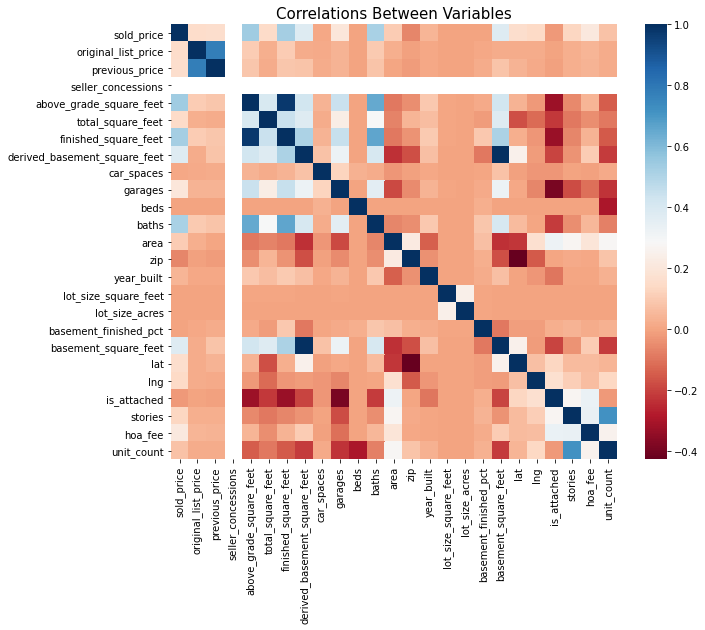

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(chicago_list_clean.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# Feature Selection

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as City, State, County...

In [13]:
important_num_cols = list(
    chicago_list_clean.corr()["sold_price"][(chicago_list_clean.corr()["sold_price"] > 0.50) | (
        chicago_list_clean.corr()["sold_price"] < -0.50)].index)

cat_cols =  

important_cols = important_num_cols + cat_cols

df = chicago_list_clean[important_cols]

In [14]:
df = df.dropna()

In [15]:
df.head()

,sold_price,above_grade_square_feet,finished_square_feet,baths,city,state,county,structural_style,property_type,architecture,structural_type,zoned,zip
675,260000.0,1788.0,1788.0,2.0,MOMENCE,IL,KANK,Cluster,Detached Single,Tri-Level,Detached,AGRIC,60954
749,299900.0,2171.0,2171.0,3.0,BOURBONNAIS,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60914
757,160000.0,1656.0,1656.0,2.0,BRADLEY,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60915
791,104000.0,1400.0,1400.0,2.0,KANKAKEE,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60901
936,259000.0,1800.0,2850.0,2.0,MANTENO,IL,KANK,1/2 Duplex,Detached Single,Traditional,Detached,SINGL,60950


In [16]:
df

,sold_price,above_grade_square_feet,finished_square_feet,baths,city,state,county,structural_style,property_type,architecture,structural_type,zoned,zip
675,260000.0,1788.0,1788.0,2.0,MOMENCE,IL,KANK,Cluster,Detached Single,Tri-Level,Detached,AGRIC,60954
749,299900.0,2171.0,2171.0,3.0,BOURBONNAIS,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60914
757,160000.0,1656.0,1656.0,2.0,BRADLEY,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60915
791,104000.0,1400.0,1400.0,2.0,KANKAKEE,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60901
936,259000.0,1800.0,2850.0,2.0,MANTENO,IL,KANK,1/2 Duplex,Detached Single,Traditional,Detached,SINGL,60950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674580,78000.0,858.0,858.0,1.0,Odell,IL,LVNG,1/2 Duplex,Detached Single,Traditional,Detached,SINGL,60460
1676509,192000.0,1524.0,1524.0,2.0,Kankakee,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60901
1683911,187500.0,1457.0,1457.0,1.0,Kankakee,IL,KANK,1/2 Duplex,Detached Single,Contemporary,Detached,SINGL,60901
1684238,160000.0,1688.0,1688.0,2.0,Hoopeston,IL,VERMIL,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60942


In [17]:
df.describe()

,sold_price,above_grade_square_feet,finished_square_feet,baths,zip
count,6385.000000,6385.000000,6385.000000,6385.000000,6385.000000
mean,148269.132968,1663.579327,1737.972749,1.673297,61042.896946
std,83499.741498,632.019369,717.217652,0.784453,492.130786
min,3500.000000,0.000000,0.000000,0.000000,31739.000000
25%,90000.000000,1245.000000,1262.000000,1.000000,60913.000000
50%,135000.000000,1561.000000,1600.000000,2.000000,60915.000000
75%,188000.000000,1944.000000,2020.000000,2.000000,60959.000000
max,830000.000000,10400.000000,10400.000000,25.000000,61883.000000


In [18]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
sold_price                 0
above_grade_square_feet    0
finished_square_feet       0
baths                      0
city                       0
state                      0
county                     0
structural_style           0
property_type              0
architecture               0
structural_type            0
zoned                      0
zip                        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [19]:
X = df.drop("sold_price", axis=1)
y = df["sold_price"]

In [20]:
X

,above_grade_square_feet,finished_square_feet,baths,city,state,county,structural_style,property_type,architecture,structural_type,zoned,zip
675,1788.0,1788.0,2.0,MOMENCE,IL,KANK,Cluster,Detached Single,Tri-Level,Detached,AGRIC,60954
749,2171.0,2171.0,3.0,BOURBONNAIS,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60914
757,1656.0,1656.0,2.0,BRADLEY,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60915
791,1400.0,1400.0,2.0,KANKAKEE,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60901
936,1800.0,2850.0,2.0,MANTENO,IL,KANK,1/2 Duplex,Detached Single,Traditional,Detached,SINGL,60950
...,...,...,...,...,...,...,...,...,...,...,...,...
1674580,858.0,858.0,1.0,Odell,IL,LVNG,1/2 Duplex,Detached Single,Traditional,Detached,SINGL,60460
1676509,1524.0,1524.0,2.0,Kankakee,IL,KANK,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60901
1683911,1457.0,1457.0,1.0,Kankakee,IL,KANK,1/2 Duplex,Detached Single,Contemporary,Detached,SINGL,60901
1684238,1688.0,1688.0,2.0,Hoopeston,IL,VERMIL,1/2 Duplex,Detached Single,Ranch,Detached,SINGL,60942


# One-Hot Encoding

Encoding the categorical features in X dataset by using One-Hot Encoding method

In [21]:
X = pd.get_dummies(X, columns=cat_cols)

# Standardizing the Data

In [22]:
important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

# Train-Test Split

Splitting the data into Train and Test chunks for better evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining several evaluation functions for convenience

In [24]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Models

In [25]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Linear Regression

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 68433152182278.2
MSE: 2.338883741113825e+30
RMSE: 1529340949923798.0
R2 Score: -3.1546364367146235e+20
------------------------------
RMSE Cross-Validation: 684426756338976.6


## Ridge Regression

In [27]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 34058.9391379298
MSE: 2444389216.1379666
RMSE: 49440.76472040018
R2 Score: 0.6703060031932621
------------------------------
RMSE Cross-Validation: 52143.03461226541


## Lasso Regression

In [28]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 34352.75999237427
MSE: 2515447506.518908
RMSE: 50154.23717413024
R2 Score: 0.6607218127512176
------------------------------
RMSE Cross-Validation: 52537.3190249967


## Elastic Net

In [29]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 40650.7111281259
MSE: 3417910857.086201
RMSE: 58462.90154522098
R2 Score: 0.538999483485575
------------------------------
RMSE Cross-Validation: 58466.06546773311


## Support Vector Machines

In [30]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 33080.296674150246
MSE: 2415413022.659172
RMSE: 49146.85160474852
R2 Score: 0.6742142502830455
------------------------------
RMSE Cross-Validation: 50359.785789265574


## Random Forest Regressor

In [31]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 35590.68520319021
MSE: 2601736744.7589397
RMSE: 51007.22247641935
R2 Score: 0.6490833045918201
------------------------------


KeyboardInterrupt: 

## XGBoost Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

## Polynomial Regression (Degree=2)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# Model Comparison

The less the Normalized Root Mean Squared Error (RMSE), The better the model is.

In [ ]:
models['Normalized RMSE'] = models["RMSE (Cross-Validation)"] / (max(df.sold_price) - min(df.sold_price))

In [ ]:
models.sort_values(by="Normalized RMSE") 

In [ ]:
models2 = models.drop([0, 7])

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models2["Model"], y=models["Normalized RMSE"])
plt.title("Models' Normalized RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

Since the RMSE value of SVM and XGBRegressor are lowest, we would select Support Vector Machine & XGBRegressor as the best model for predicting house prices since the average distance between the predicted prices and the actual prices is lowest for that model.

# Models Testing

## XBG

In [ ]:
test_data = pd.read_csv('test_data_1.csv')

In [ ]:
test_data = test_data.drop(columns=['list_price'])

In [ ]:
test_data['zip'] = [60954, 60954]

In [ ]:
test_data

In [ ]:
new_df = pd.concat([df, test_data], ignore_index=True, sort=False)

In [ ]:
X = new_df.drop("sold_price", axis=1)
y = new_df["sold_price"]

In [ ]:
X2 = pd.get_dummies(X, columns=cat_cols)
# important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
X = X2.drop([6385, 6386])
y = y.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

In [ ]:
predictions2 = xgb.predict(X2)

In [ ]:
new_df['estimated_price'] = np.round(predictions2)

In [ ]:
new_df = new_df[[
    'above_grade_square_feet', 'finished_square_feet', 'baths',
    'city', 'state', 'county', 'structural_style', 'property_type',
    'architecture', 'structural_type', 'zoned', 'zip',
    'sold_price', 'estimated_price'
]]

new_df

## Support Vector Machines

In [ ]:
X = new_df.drop("sold_price", axis=1)
y = new_df["sold_price"]

In [ ]:
X2 = pd.get_dummies(X, columns=cat_cols)
# important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
X = X2.drop([6385, 6386])
y = y.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions2 = svr.predict(X2)

In [ ]:
new_df['estimated_price'] = np.round(predictions2)

In [ ]:
new_df = new_df[[
    'above_grade_square_feet', 'finished_square_feet', 'baths',
    'city', 'state', 'county', 'structural_style', 'property_type',
    'architecture', 'structural_type', 'zoned', 'zip',
    'sold_price', 'estimated_price'
]]

new_df

# With list_price

In [ ]:
chicago_list_clean = chicago_list.copy()

In [ ]:
chicago_list_clean = chicago_list_clean.drop(columns=[
    'id', 'property_id', 'listing_number', 'status_changed_on', 'created_at',
    'updated_at', 'status', 'listed_on', 'contracted_on', 'off_market_on',
    'sold_on', 'subdivision', 'street', 'property_key',
    'externally_last_updated_at', 'photos', 'photos_pulled', 'public_remarks',
    'description', 'listing_agent', 'listing_brokerage', 'parcel_number',
    'private_remarks', 'price_changes', 'county_data_id', 'car_storage'
])

In [ ]:
chicago_list_clean['zip'] = pd.to_numeric(chicago_list_clean['zip'], errors='coerce')
chicago_list_clean = chicago_list_clean.dropna(subset=['zip'])
chicago_list_clean['zip'] = chicago_list_clean['zip'].astype('int')

In [ ]:
important_num_cols = list(
    chicago_list_clean.corr()["sold_price"][(chicago_list_clean.corr()["sold_price"] > 0.50) | (
        chicago_list_clean.corr()["sold_price"] < -0.50)].index)

cat_cols = [
    "city", "state", "county", "structural_style", "property_type",
    "architecture", "structural_type", "zoned", "zip"
]

important_cols = important_num_cols + cat_cols

df = chicago_list_clean[important_cols]

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop("sold_price", axis=1)
y = df["sold_price"]

In [ ]:
X = pd.get_dummies(X, columns=cat_cols)

In [ ]:
important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models_wlistprice = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models_wlistprice = models_wlistprice.append(new_row, ignore_index=True)

In [ ]:
models_wlistprice['Normalized RMSE'] = models_wlistprice["RMSE (Cross-Validation)"] / (max(df.sold_price) - min(df.sold_price))

In [ ]:
models_wlistprice.sort_values(by="Normalized RMSE") 

# Testing

In [ ]:
test_data = pd.read_csv('test_data_1.csv')

In [ ]:
new_df = pd.concat([df, test_data], ignore_index=True, sort=False)

In [ ]:
X = new_df.drop("sold_price", axis=1)
y = new_df["sold_price"]

In [ ]:
X2 = pd.get_dummies(X, columns=cat_cols)
# important_num_cols.remove("sold_price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
X = X2.drop([6385, 6386])
y = y.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions3 = xgb.predict(X2)

In [ ]:
new_df['estimated_price'] = np.round(predictions3)
new_df = new_df[[
    'above_grade_square_feet', 'finished_square_feet', 'baths',
    'city', 'state', 'county', 'structural_style', 'property_type',
    'architecture', 'structural_type', 'zoned', 'zip',
    'list_price', 'sold_price', 'estimated_price'
]]

new_df

In [ ]:
df.to_csv('Test2.csv')